In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f

alpha = 0.05
a = 5
n = 4

x = pd.read_csv("Project2.csv")
data = x.values[:,1:3]
# print(data)

# Sort them into groups, according to column 1("Method")
group1 = data[data[:,0] == 1,1]
group2 = data[data[:,0] == 2,1]
group3 = data[data[:,0] == 3,1]
group4 = data[data[:,0] == 4,1]
group5 = data[data[:,0] == 5,1]

# Do the one-way ANOVA
df = pd.DataFrame(data, columns = ['display', 'percent'])   
model = ols('percent ~ C(display)', df).fit()
anovaResults = round(anova_lm(model), 2)
print('The ANOVA table: \n', anovaResults)

F0, pVal1 = stats.f_oneway(group1, group2, group3, group4, group5)
# 法1：
# print(pVal1)
if pVal1 < alpha:
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.') 
    
# 法2：
F = round(f.ppf(0.95,dfn = 4,dfd = 15), 2)
if F0 > F:
    print('Since F0 > F(0.05, 3, 20) = ', F, ', reject H0.')
else:
    print('Accept H0.') 


The ANOVA table: 
               df       sum_sq     mean_sq     F  PR(>F)
C(display)   4.0  103191489.2  25797872.3  6.19     0.0
Residual    15.0   62505657.0   4167043.8   NaN     NaN

Since p-value < 0.05, reject H0.
Since F0 > F(0.05, 3, 20) =  3.06 , reject H0.


73.7804417752238
9.487729036781158
Bartlett检验的P值为： 0.0
Since p-value < 0.05, reject H0.

Levene检验的P值为： 0.0043
Since p-value < 0.05, reject H0.



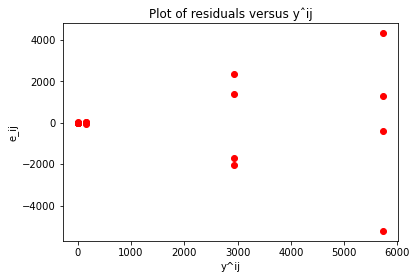

In [2]:
# 计算销售百分比的残差
data_res = data.astype(float) * 1
for k in range(a):
    cnt = data_res[data_res[:,0] == k + 1,1]
    data_res[data_res[:,0] == k + 1,1] = cnt - np.mean(cnt)
# print(data_res)

# 法1：残差与拟合值的关系图
res = data_res[:,1]
y = []
for i in range(a):
    for j in range(n):
        y.append(np.mean(data[(data[:,0] == i + 1),1]))
plt.scatter(y, res, c = "red")
plt.title('Plot of residuals versus yˆij')
plt.xlabel('y^ij')
plt.ylabel('e_ij')

# 用Bartlett检验进行方差齐性检验
bart, pVal2 = stats.bartlett(group1, group2, group3, group4, group5)
bart_stat = stats.chi2.isf(alpha, a-1)
print(bart)
print(bart_stat)
print('Bartlett检验的P值为：', round(pVal2, 4))
if pVal2 < alpha:
    print('Since p-value < 0.05, reject H0.')
else:
    print('Accept H0')  

# 用Levene检验进行方差齐性检验
lene, pVal3 = stats.levene(group1, group2, group3, group4, group5)
print('\nLevene检验的P值为：', round(pVal3, 4))
if pVal3 < alpha:
    print('Since p-value < 0.05, reject H0.\n')
else:
    print('Accept H0\n')  

斜率为： 0.92


Text(0, 0.5, 'log_Si')

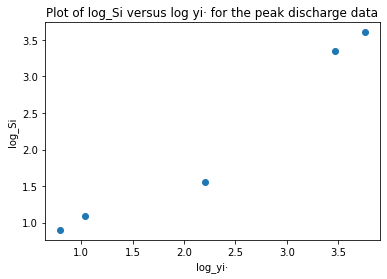

In [3]:
# 求出各估计方法的标准差sigma_i和均值mu_i的对数
# 通常用样本的标准差std_i和均值y_i代替总体的标准差sigma_i和均值mu_i
log_y_1 = math.log10(np.mean(group1))
log_y_2 = math.log10(np.mean(group2))
log_y_3 = math.log10(np.mean(group3))
log_y_4 = math.log10(np.mean(group4))
log_y_5 = math.log10(np.mean(group5))
log_y = [log_y_1, log_y_2, log_y_3, log_y_4, log_y_5]

log_std_1 = math.log10(np.std(group1, ddof = 1))
log_std_2 = math.log10(np.std(group2, ddof = 1))
log_std_3 = math.log10(np.std(group3, ddof = 1))
log_std_4 = math.log10(np.std(group4, ddof = 1))
log_std_5 = math.log10(np.std(group5, ddof = 1))
log_std = [log_std_1, log_std_2, log_std_3, log_std_4, log_std_5]

# linregress(x,y)线性回归函数
slope, intercept, r_value, p_value, std_err = stats.linregress(log_y, log_std)
print('斜率为：', round(slope, 2))

# 作图
plt.scatter(log_y, log_std)
plt.title('Plot of log_Si versus log yi· for the peak discharge data')
plt.xlabel('log_yi·')
plt.ylabel('log_Si')


In [4]:
# 对y值开方，即通过开根号进行方差稳定化变换
sqrt_group1 = np.log(group1)
sqrt_group2 = np.log(group2)
sqrt_group3 = np.log(group3)
sqrt_group4 = np.log(group4)
sqrt_group5 = np.log(group5)
sqrt_groups = [sqrt_group1, sqrt_group2, sqrt_group3, sqrt_group4, sqrt_group5]
sqrt_groups1 = pd.DataFrame(sqrt_groups)
# print(sqrt_groups1)

# 计算变换后销售百分比的残差
df = np.array(sqrt_groups)
sqrt_data = [data[:,0], df.reshape(1, 20).tolist()[0]]
sqrt_data = np.array(sqrt_data * 1).T
sqrt_data_res = sqrt_data * 1
for k in range(a):
    sqrt_cnt = sqrt_data_res[sqrt_data_res[:,0] == k + 1,1]
    sqrt_data_res[sqrt_data_res[:,0] == k + 1,1] =sqrt_cnt - np.mean(sqrt_cnt)

# 变换后的残差与拟合值的关系图
sqrt_res = sqrt_data_res[:,1]
sqrt_y = []
for i in range(a):
    for j in range(n):
        sqrt_y.append(np.mean(data_[(data_[:,0] == i + 1),1]))
plt.scatter(sqrt_y, sqrt_res, c = "red")
plt.title('Plot of residuals versus y_ij*')
plt.xlabel('y_ij*')
plt.ylabel('e_ij*')

NameError: name 'data_' is not defined

lmax_mle:  0.016756747738272192
lmax_pearsonr:  0.014405180057034986


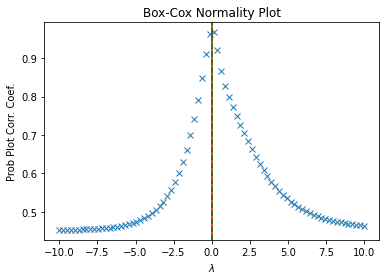

Text(0, 0.5, 'e_ij*')

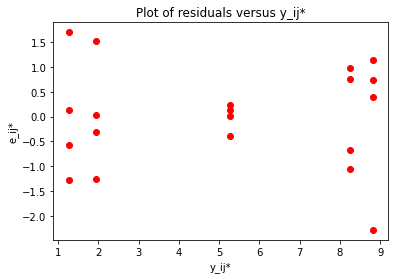

In [7]:
# 作Box-Cox变换
dataa = data[:,1] * 1
bc, lmax_mle = stats.boxcox(dataa)
lmax_pearsonr = stats.boxcox_normmax(dataa)
print('lmax_mle: ', lmax_mle)
print('lmax_pearsonr: ', lmax_pearsonr)

fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(dataa, -10, 10, plot = ax)
ax.axvline(lmax_mle, color='r')
ax.axvline(lmax_pearsonr, color='g', ls='--')
plt.show()

# 计算变换后销售百分比的残差
bc_group1 = bc[0:4]
bc_group2 = bc[4:8]
bc_group3 = bc[8:12]
bc_group4 = bc[12:16]
bc_group5 = bc[16:20]
bc_groups = [bc_group1, bc_group2, bc_group3, bc_group4, bc_group5]
bc_groups1 = pd.DataFrame(bc_groups)
# print(bc_groups1)
df = np.array(bc_groups)
bc_data = [data[:,0], df.reshape(1, 20).tolist()[0]]
bc_data = np.array(bc_data * 1).T
bc_data_res = bc_data * 1
for k in range(a):
    bc_cnt = bc_data_res[bc_data_res[:,0] == k + 1,1]
    bc_data_res[bc_data_res[:,0] == k + 1,1] = bc_cnt - np.mean(bc_cnt)

# 变换后的残差与拟合值的关系图
bc_res = bc_data_res[:,1]
bc_y = []
for i in range(a):
    for j in range(n):
        bc_y.append(np.mean(bc_data[(bc_data[:,0] == i + 1),1]))
plt.scatter(bc_y, bc_res, c = "red")
plt.title('Plot of residuals versus y_ij*')
plt.xlabel('y_ij*')
plt.ylabel('e_ij*')

In [8]:
# 开根号后，再用Levene检验进行方差齐性检验
sqrt_lene, pVal4 = stats.levene(sqrt_group1, sqrt_group2, sqrt_group3, sqrt_group4, sqrt_group5)
if pVal4 < alpha:
    print('Since p-value < 0.05, reject H0.\n')
else:
    print('Accept H0\n')  
    
# Box-Cox变换后，再用Levene检验进行方差齐性检验 
bc_lene, pVal5 = stats.levene(bc_group1, bc_group2, bc_group3, bc_group4, bc_group5)
if pVal5 < alpha:
    print('Since p-value < 0.05, reject H0.\n')
else:
    print('Accept H0\n') 

# 开根号后，Do the one-way ANOVA with transformation of square root
sqrt_F0, pVal6 = stats.f_oneway(sqrt_group1, sqrt_group2, sqrt_group3, sqrt_group4, sqrt_group5)
if pVal6 < alpha:
    print('Since p-value < 0.05, reject H0.\n')
else:
    print('Accept H0\n') 
    
# Box-Cox变换后，Do the one-way ANOVA with transformation of square root
bc_F0, pVal7 = stats.f_oneway(bc_group1, bc_group2, bc_group3, bc_group4, bc_group5)
if pVal7 < alpha:
    print('Since p-value < 0.05, reject H0.\n')
else:
    print('Accept H0\n') 

# Elegant alternative implementation, with pandas & statsmodels
for i in range(a):
    data[0 + 4 * i:4 * (i + 1), 1] = list(sqrt_groups[i])
#     data[0 + 4 * i:4 * (i + 1), 1] = list(bc_groups[i])
df = pd.DataFrame(data, columns = ['method', 'Y'])   
model = ols('Y ~ C(method)', df).fit()
anovaResults = anova_lm(model)
print(anovaResults)

Accept H0

Accept H0

Since p-value < 0.05, reject H0.

Since p-value < 0.05, reject H0.

             df  sum_sq  mean_sq          F        PR(>F)
C(method)   4.0  170.80    42.70  40.666667  6.989360e-08
Residual   15.0   15.75     1.05        NaN           NaN
